# Exploring the phase space of a jet: 1-D Unfolding  (for now)

## Unfolding the the $N$-subjettiness bases in semileptonic $t\bar{t}$ events at $\sqrt{s} = 13$ TeV

#### Firstly , import the ROOT data analysis framework which will be used to read the data files and unfold the final result. 

In [1]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table

Welcome to JupyROOT 6.18/00


#### Save a nametag describing the selection applied to events being read from the input file below. This is used to name the saved plots.

In [2]:
nametag = 'Selection from AN-19-074'

In [3]:
lumi = 5.75+2.57+4.24+4.03+3.11+7.57+8.65 #B+C+D+E+F+G+H
print (lumi)
ptmin = 200.
ptmax = 1500.
mSDmin = 65.
mSDmax = 125.
leptWpTmin = 200.

35.92


#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


### Using Powheg+Pythia8 samples as gen and MC and MG5+P8 as "data"

In [4]:
filelist = []
path = '../AutoObs/CMS/New_Sel/TTrecogen/1/*.root'
files=glob.glob(path)   
for f in files:     
    filelist.append(f)
        
print (len(filelist))
dataset = []
c=0
for f in filelist:
    F = ROOT.TFile.Open(f, 'read')
    
    T = F.Get("Events");
    
    
    
    
    
    data = rtnpy. tree2array(T, branches=['goodrecojet0_softdrop_mass',
                                      'goodrecojet0_tau_0p5_0','goodrecojet0_tau_1_0','goodrecojet0_tau_2_0',
                                      'goodrecojet0_tau_0p5_1','goodrecojet0_tau_1_1','goodrecojet0_tau_2_1',
                                      'goodrecojet0_tau_0p5_2','goodrecojet0_tau_1_2','goodrecojet0_tau_2_2',
                                      'goodrecojet0_tau_0p5_3','goodrecojet0_tau_1_3','goodrecojet0_tau_2_3',
                                      'goodrecojet0_tau_0p5_4','goodrecojet0_tau_1_4','goodrecojet0_tau_2_4',
                                      'goodrecojet0_tau_0p5_5','goodrecojet0_tau_1_5','goodrecojet0_tau_2_5',
                                      'goodrecojet0_tau_0p5_6','goodrecojet0_tau_1_6','goodrecojet0_tau_2_6',
                                      'goodrecojet0_mass', 'goodrecojet0_pt', 'goodrecojet0_eta',
                                      'goodrecojet0_phi',
                                      'MET', 'goodrecojet0_tau21', 'goodrecojet0_N21',
                                      'FatJet_tau1','FatJet_tau2','FatJet_tau3','FatJet_tau4', 'leptonicW_pT', 
                                      'lepton_pT', 'puWeight', 'PV_npvsGood', 'btagWeight_CSVV2',
                                      'dr_LepJet', 'dphi_MetJet', 'dphi_WJet','genmatchedrecoAK8', 'passedMETfilters',
                                      'goodgenjet0_mass',
                                      'goodgenjet0_tau_0p5_0','goodgenjet0_tau_1_0','goodgenjet0_tau_2_0',
                                      'goodgenjet0_tau_0p5_1','goodgenjet0_tau_1_1','goodgenjet0_tau_2_1',
                                      'goodgenjet0_tau_0p5_2','goodgenjet0_tau_1_2','goodgenjet0_tau_2_2',
                                      'goodgenjet0_tau_0p5_3','goodgenjet0_tau_1_3','goodgenjet0_tau_2_3',
                                      'goodgenjet0_tau_0p5_4','goodgenjet0_tau_1_4','goodgenjet0_tau_2_4',
                                      'goodgenjet0_tau_0p5_5','goodgenjet0_tau_1_5','goodgenjet0_tau_2_5',
                                      'goodgenjet0_tau_0p5_6','goodgenjet0_tau_1_6','goodgenjet0_tau_2_6',
                                      'goodgenjet0_pt', 'goodgenjet0_eta', 'goodgenjet0_phi'
                                        ])

    
    if len(dataset)==0:
        print (c)
        dataset=data
    else:
        dataset = np.concatenate((dataset,data))
        
    c=c+1
    if c%5==0:
        print ("on file %d"%c)

577
0
on file 5
on file 10
on file 15
on file 20
on file 25
on file 30
on file 35
on file 40
on file 45
on file 50
on file 55
on file 60
on file 65
on file 70
on file 75
on file 80
on file 85
on file 90
on file 95
on file 100
on file 105
on file 110
on file 115
on file 120
on file 125
on file 130
on file 135
on file 140
on file 145
on file 150
on file 155
on file 160
on file 165
on file 170
on file 175
on file 180
on file 185
on file 190
on file 195
on file 200
on file 205
on file 210
on file 215
on file 220
on file 225
on file 230
on file 235
on file 240
on file 245
on file 250
on file 255
on file 260
on file 265
on file 270
on file 275
on file 280
on file 285
on file 290
on file 295
on file 300
on file 305
on file 310
on file 315
on file 320
on file 325
on file 330
on file 335
on file 340
on file 345
on file 350
on file 355
on file 360
on file 365
on file 370
on file 375
on file 380
on file 385
on file 390
on file 395
on file 400
on file 405
on file 410
on file 415
on file 420
on fil

Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [5]:
#pars = [1.02,-1.06,0.22,-0.27,0.15,0.00,0.18,0.02]# [ 0.49631107, -0.91138405, 0.11273356, -0.26872, 0.04777313, 0.06521296, 0.51138633, -0.03617261]
#pars = [0.,-1.,0.,0.,1.,0.,0.,0.]
pars = -1* np.array([-0.195,  1.183,  -0.219,  0.674,  -0.44,   0.003, -0.634,  -0.042]) #[ 0.06849562,  0.99606407, -0.20875171,  0.3780923 , -0.07821123, -0.05920516, -0.79644126,  0.02925767]#[1.02,-1.06,0.22,-0.27,0.15,0.00,0.18,0.02]# [ 1.0470642 , 0.3308942 , -0.08472812, 0.4989206, -0.2598824, 0.00597894, -0.6826088 , -0.06705493]

c=0
for i in range(0,dataset.shape[0]):
    if mSDmin<dataset[i][0]<=mSDmax and ptmin<dataset[i][23]<ptmax and leptWpTmin<dataset[i][33] and dataset[i][38]>np.pi/2 and dataset[i][39]>2. and dataset[i][40]>2. and dataset[i][42]==1:# and dataset[i][27]<0.45:
        #if ((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))>3.:
        c=c+1

print (c)
TT16reco_npv = np.ones(c)
TT16reco_beta4W = np.ones(c)
TT16reco_pt = np.ones(c)
TT16reco_eta = np.ones(c)
TT16reco_met = np.ones(c)
TT16reco_lWpt = np.ones(c)
TT16reco_lept_pT = np.ones(c)
TT16reco_mass = np.ones(c)
TT16reco_sdmass = np.ones(c)
TT16reco_tau1 = np.ones(c)
TT16reco_tau2 = np.ones(c)
TT16reco_tau3 = np.ones(c)
TT16reco_tau4 = np.ones(c)
TT16reco_tau21 = np.ones(c)
TT16reco_N21 = np.ones(c)
TT16reco_puWeight = np.ones(c)
TT16reco_btagWeight = np.ones(c)
fatjet_TT16reco_tau1 = np.ones(c)
fatjet_TT16reco_tau2 = np.ones(c)
fatjet_TT16reco_tau3 = np.ones(c)
fatjet_TT16reco_tau4 = np.ones(c)
fatjet_TT16reco_tau21 = np.ones(c)


TT16reco_nSub_basis = np.ones((c,21))

TT16reco_tau1_0p5 = np.ones(c)
TT16reco_tau1_1 = np.ones(c)
TT16reco_tau1_2 = np.ones(c)
TT16reco_tau2_0p5 = np.ones(c)
TT16reco_tau2_1 = np.ones(c)
TT16reco_tau2_2 = np.ones(c)
TT16reco_tau3_0p5 = np.ones(c)
TT16reco_tau3_1 = np.ones(c)
TT16reco_tau3_2 = np.ones(c)
TT16reco_tau4_0p5 = np.ones(c)
TT16reco_tau4_1 = np.ones(c)
TT16reco_tau4_2 = np.ones(c)
TT16reco_tau5_0p5 = np.ones(c)
TT16reco_tau5_1 = np.ones(c)
TT16reco_tau5_2 = np.ones(c)
TT16reco_tau6_0p5 = np.ones(c)
TT16reco_tau6_1 = np.ones(c)
TT16reco_tau6_2 = np.ones(c)
TT16reco_tau7_0p5 = np.ones(c)
TT16reco_tau7_1 = np.ones(c)
TT16reco_tau7_2 = np.ones(c)

TT16gen_tau21 = np.ones(c)
TT16gen_beta4W = np.ones(c)
TT16gen_pt = np.ones(c)
TT16gen_eta = np.ones(c)
TT16gen_mass = np.ones(c)

TT16gen_nSub_basis = np.ones((c,21))

TT16gen_tau1_0p5 = np.ones(c)
TT16gen_tau1_1 = np.ones(c)
TT16gen_tau1_2 = np.ones(c)
TT16gen_tau2_0p5 = np.ones(c)
TT16gen_tau2_1 = np.ones(c)
TT16gen_tau2_2 = np.ones(c)
TT16gen_tau3_0p5 = np.ones(c)
TT16gen_tau3_1 = np.ones(c)
TT16gen_tau3_2 = np.ones(c)
TT16gen_tau4_0p5 = np.ones(c)
TT16gen_tau4_1 = np.ones(c)
TT16gen_tau4_2 = np.ones(c)
TT16gen_tau5_0p5 = np.ones(c)
TT16gen_tau5_1 = np.ones(c)
TT16gen_tau5_2 = np.ones(c)
TT16gen_tau6_0p5 = np.ones(c)
TT16gen_tau6_1 = np.ones(c)
TT16gen_tau6_2 = np.ones(c)
TT16gen_tau7_0p5 = np.ones(c)
TT16gen_tau7_1 = np.ones(c)
TT16gen_tau7_2 = np.ones(c)

c=0
d1=0
d2=0
for i in range(0,dataset.shape[0]):
    if mSDmin<dataset[i][0]<=mSDmax and ptmin<dataset[i][23]<ptmax and leptWpTmin<dataset[i][33] and dataset[i][38]>np.pi/2 and dataset[i][39]>2. and dataset[i][40]>2. and dataset[i][42]==1:# and dataset[i][27]<0.45:
        #print dataset[i][29]
        #if ((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))>3.:
        TT16reco_pt[c] = dataset[i][23]
        TT16reco_eta[c] = dataset[i][24]
        TT16reco_met[c] = dataset[i][26]
        TT16reco_mass[c] = dataset[i][22]
        TT16reco_lWpt[c] = dataset[i][33]
        TT16reco_lept_pT[c] = dataset[i][34]
        TT16reco_sdmass[c] = dataset[i][0]
        TT16reco_tau1[c] = dataset[i][2]
        TT16reco_tau2[c] = dataset[i][5]
        TT16reco_tau3[c] = dataset[i][8]
        TT16reco_tau4[c] = dataset[i][11]
        TT16reco_tau21[c] = dataset[i][27]
        TT16reco_N21[c] = dataset[i][28]
        TT16reco_puWeight[c] = dataset[i][35]
        TT16reco_btagWeight[c] = dataset[i][37]
        TT16reco_npv[c] = dataset[i][36]
        fatjet_TT16reco_tau1[c] = dataset[i][29][0]
        fatjet_TT16reco_tau2[c] = dataset[i][30][0]
        fatjet_TT16reco_tau3[c] = dataset[i][31][0]
        fatjet_TT16reco_tau4[c] = dataset[i][32][0]
        
        for z in range(0,21):
            TT16reco_nSub_basis[c][z] = dataset[i][z+1]
        TT16reco_tau1_0p5[c] = dataset[i][1]
        TT16reco_tau1_1[c] = dataset[i][2]
        TT16reco_tau1_2[c] = dataset[i][3]
        TT16reco_tau2_0p5[c] = dataset[i][4]
        TT16reco_tau2_1[c] = dataset[i][5]
        TT16reco_tau2_2[c] = dataset[i][6]

        
        TT16gen_pt[c] = dataset[i][65]
        TT16gen_eta[c] = dataset[i][66]
        TT16gen_mass[c] = dataset[i][43]
        
        for z in range(0,21):
            TT16gen_nSub_basis[c][z] = dataset[i][z+44]   
        
        TT16gen_tau1_0p5[c] = dataset[i][44]
        TT16gen_tau1_1[c] = dataset[i][45]
        TT16gen_tau1_2[c] = dataset[i][46]
        TT16gen_tau2_0p5[c] = dataset[i][47]
        TT16gen_tau2_1[c] = dataset[i][48]
        TT16gen_tau2_2[c] = dataset[i][49]
        
        
        if TT16reco_tau1_1[c]!=0:
            TT16reco_tau21[d1] = TT16reco_tau2_1[c]/TT16reco_tau1_1[c]
            d1=d1+1
        TT16reco_beta4W[c]=((dataset[i][1])**(pars[0]))*((dataset[i][2])**(pars[1]))*((dataset[i][3])**(pars[2]))*((dataset[i][4])**(pars[3]))*((dataset[i][5])**(pars[4]))*((dataset[i][6])**(pars[5]))*((dataset[i][8])**(pars[6]))*((dataset[i][9])**(pars[7]))
        
        if TT16gen_tau1_1[c]!=0:
            TT16gen_tau21[d2] = TT16gen_tau2_1[c]/TT16gen_tau1_1[c]
            d2=d2+1
        TT16gen_beta4W[c]=((dataset[i][44])**(pars[0]))*((dataset[i][45])**(pars[1]))*((dataset[i][46])**(pars[2]))*((dataset[i][47])**(pars[3]))*((dataset[i][48])**(pars[4]))*((dataset[i][49])**(pars[5]))*((dataset[i][51])**(pars[6]))*((dataset[i][52])**(pars[7]))
        if np.isnan(TT16gen_beta4W[c]): 
            print ("nan nan nan!!!", c, (dataset[i][44]), (dataset[i][45]), (dataset[i][46]), (dataset[i][47]), (dataset[i][48]), (dataset[i][49]), (dataset[i][51]), (dataset[i][52]), (dataset[i][65]), (dataset[i][66]), (dataset[c][43]))
        if np.isinf(TT16gen_beta4W[c]): 
            print ("inf inf inf!!!", c)
        
        c=c+1
#print np.min(var_sig), np.max(var_sig)
#TT16reco_SF = np.exp(0.0615+0.0005*TT16reco_pt)
#print TT16reco_SF, np.mean(TT16reco_SF)

57158


/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:151: RuntimeWarning: divide by zero encountered in power
/shome/kdatta/.local/lib/python2.7/site-packages/ipykernel_launcher.py:151: RuntimeWarning: invalid value encountered in double_scalars


('nan nan nan!!!', 15422, 0.03056116, 0.001708532, 0.00031756982, 0.0, 0.0, 0.0, 0.0, 0.0, 184.54639, 1.9655762, 93.5625)


## 1-D unfolding of full $N$-subjettiness basis

In [6]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *
length = np.int(TT16gen_nSub_basis.shape[0])
unfold_length = np.int(np.floor(0.8*length))

In [7]:
TT16truth_nSub_basis = TT16gen_nSub_basis[unfold_length:,:]
TT16gen_nSub_basis = TT16gen_nSub_basis[:unfold_length,:]
print TT16gen_nSub_basis.shape[0], TT16truth_nSub_basis.shape[0]

TT16data_nSub_basis = TT16reco_nSub_basis[unfold_length:,:]
TT16reco_nSub_basis = TT16reco_nSub_basis[:unfold_length,:]
print TT16reco_nSub_basis.shape[0], TT16data_nSub_basis.shape[0]

45726 11432
45726 11432


# Unfold $\tau_1^{(0.5)}$

#### Set the axis ranges for the generator and detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [8]:
print np.min(TT16gen_nSub_basis[:,0])
print np.min(TT16reco_nSub_basis[:,0])
print np.max(TT16gen_nSub_basis[:,0])
print np.max(TT16reco_nSub_basis[:,0])
print np.max(TT16truth_nSub_basis[:,0])
print np.max(TT16data_nSub_basis[:,0])

0.02254972793161869
0.2162497490644455
0.7921093702316284
0.7946196794509888
0.7815538644790649
0.7765287160873413


In [9]:
nDet=40
nGen=20

gen_bins = [x for x in np.linspace(num=16, start=0.2, stop=0.8)]
#print gen_bins
gen_bins = np.concatenate((np.array([0., 0.08, 0.16]), gen_bins))
print gen_bins, gen_bins.shape[0]

det_bins = [x for x in np.linspace(num=31, start=0.2, stop=0.8)]
#print det_bins
det_bins = np.concatenate((np.array([0., 0.04, 0.08, 0.12, 0.16,]), det_bins))
print det_bins, det_bins.shape[0]
#nt_t  binnum = sizeof(bins)/sizeof(Float_t) - 1; // or just = 9
#TH1F* h = new TH1F("n","t", binnum, bins);

xminDet=0.
xmaxDet=0.8
xminGen=0.
xmaxGen=0.8
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


[0.   0.08 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6
 0.64 0.68 0.72 0.76 0.8 ] 19
[0.   0.04 0.08 0.12 0.16 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36
 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64
 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8 ] 36


Get the response matrix and input 1D distributions for unfolding.

In [10]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{1}^{2}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC, TT16gen_nSub_basis[:,0])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{1}^{2}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC, TT16reco_nSub_basis[:,0])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{1}^{2}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenData, TT16truth_nSub_basis[:,0])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{1}^{2}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, TT16data_nSub_basis[:,0])


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,0].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,0].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,0].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [11]:
response.SetTitle(";#tau_{1}^{0.5}(det);#tau_{1}^{0.5}(gen)")


histMgenMC.SetTitle(";#tau_{1}^{0.5}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{1}^{0.5}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{1}^{0.5}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{1}^{0.5}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

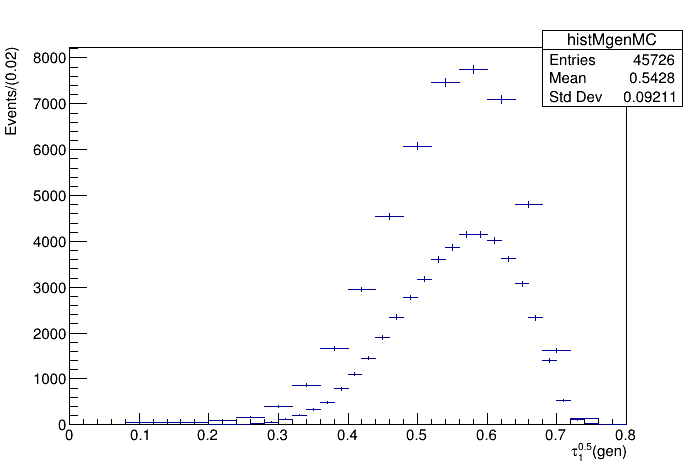

In [12]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


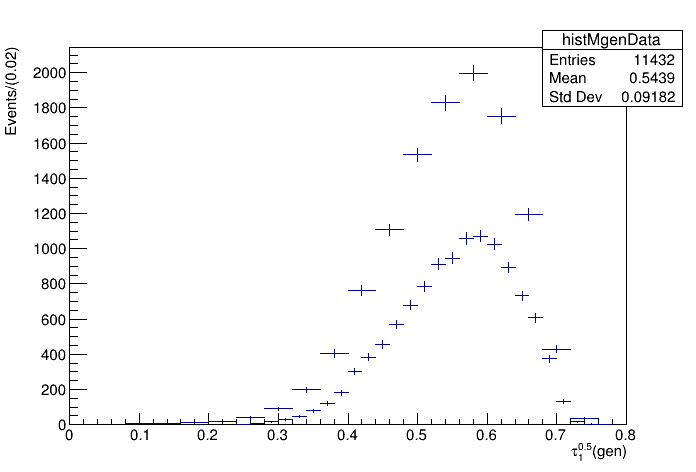

In [13]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

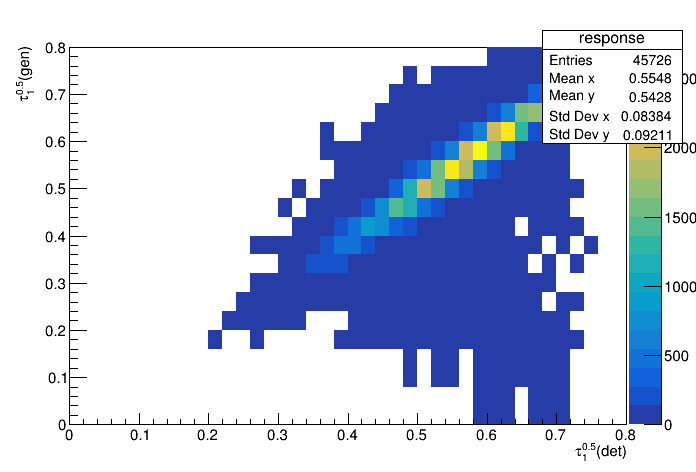

In [14]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Instatiate the TUnfoldDensity Class object

#### The argument input is as follows:

1. Response Matrix: It is drawn above on TCanvas "cresponse1"

2. Output Map: This is just stating whether you have generator or reconstruted level information on your X vs Y axis of the response matrix. For our current configuration, X axis is gen, Y axis is reco, the correct output is ROOT.TUnfold.kHistMapOutputVert 

3. Regularization Mode : Currently this notebook uses ROOT.TUnfold.kRegModeCurvature which regularizes based on the regularize the 2nd derivative of the output. More information wrt the other options can be gained from reading the __[source code](https://root.cern.ch/doc/v608/TUnfold_8h_source.html#l00107)__ 

4. Constraint :  Here we use ROOT.TUnfold.kEConstraintNone , meaning we do not constrain further, the other option is to force constraint of area. (Need to look into this!!)

5. Density Mode: Here we use ROOT.TUnfoldDensity.kDensityModeBinWidth which uses the bin width to normalize the event rate in a given bin, accounting for non-uniformity in bin widths as discussed in __[section 7.2.1 of the TUnfold paper](https://arxiv.org/pdf/1205.6201.pdf)__

In [15]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 35 input bins and 18 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{1}^{0.5}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #19 (yaxis:#tau_{1}^{0.5}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [16]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


8

Warning in <TUnfoldDensity::SetInput>: 8/35 input bins have zero error, and are ignored.


Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=-6.0
tauMax=6.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)



print 'doing the unfolding'
iBest=tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")
rhoij = tunfolder.GetRhoIJ("correlation", "#tau_{1}^{(0.5)}")
#plt.plot(lCurve)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


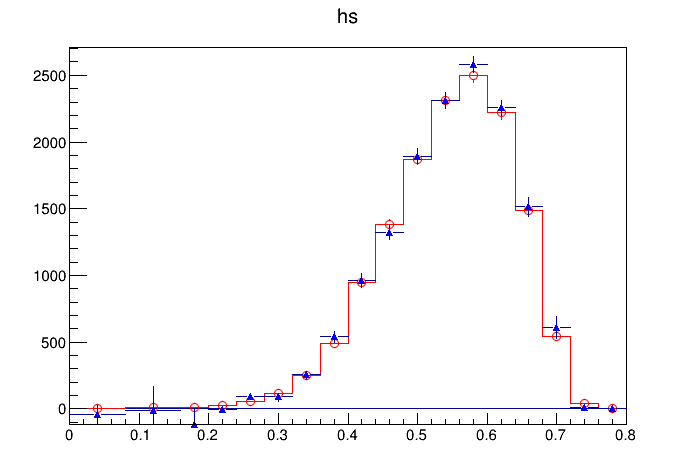

In [48]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(4)
histMgenData.SetMarkerColor(2)
histMgenData.SetOption("E")
histMgenData.SetLineColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "E HIST")
hs.Add( unfolded, "E")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_1^{(1)}$

Get the response matrix and input 1D distributions for unfolding.

#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [90]:
print np.min(TT16gen_nSub_basis[:,1])
print np.min(TT16reco_nSub_basis[:,1])
print np.max(TT16gen_nSub_basis[:,1])
print np.max(TT16reco_nSub_basis[:,1])
print np.max(TT16truth_nSub_basis[:,1])
print np.max(TT16data_nSub_basis[:,1])

0.0017085319850593805
0.07775519788265228
0.63550865650177
0.6391461491584778
0.6168755292892456
0.6152770519256592


In [137]:
nDet=40
nGen=20

gen_bins = [x for x in np.linspace(num=16, start=0.1, stop=0.61)]
#print gen_bins
gen_bins = np.concatenate(( np.array([0., 0.05]), gen_bins,np.array([0.64])))
print gen_bins, gen_bins.shape[0]

det_bins = [x for x in np.linspace(num=31, start=0.1, stop=0.625)]
#print det_bins
det_bins = np.concatenate(( np.array([0., 0.025, 0.05, 0.075]), det_bins, np.array([0.64])))
print det_bins, det_bins.shape[0]
#nt_t  binnum = sizeof(bins)/sizeof(Float_t) - 1; // or just = 9
#TH1F* h = new TH1F("n","t", binnum, bins);

xminDet=0.
xmaxDet=0.8
xminGen=0.
xmaxGen=0.8
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


[0.    0.05  0.1   0.134 0.168 0.202 0.236 0.27  0.304 0.338 0.372 0.406
 0.44  0.474 0.508 0.542 0.576 0.61  0.64 ] 19
[0.     0.025  0.05   0.075  0.1    0.1175 0.135  0.1525 0.17   0.1875
 0.205  0.2225 0.24   0.2575 0.275  0.2925 0.31   0.3275 0.345  0.3625
 0.38   0.3975 0.415  0.4325 0.45   0.4675 0.485  0.5025 0.52   0.5375
 0.555  0.5725 0.59   0.6075 0.625  0.64  ] 36


In [124]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{1}^{2}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC, TT16gen_nSub_basis[:,1])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{1}^{2}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC, TT16reco_nSub_basis[:,1])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{1}^{2}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenData, TT16truth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{1}^{2}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, TT16data_nSub_basis[:,1])


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,1].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,1].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,1].flatten()
fill_hist(response, hist2Dfill)

Warning in <TFile::Append>: Replacing existing TH1: histMgenMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMgenData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: response (Potential memory leak).


Set the X and Y axis labels

In [125]:
response.SetTitle(";#tau_{1}^{1}(det);#tau_{1}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{1}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{1}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{1}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{1}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

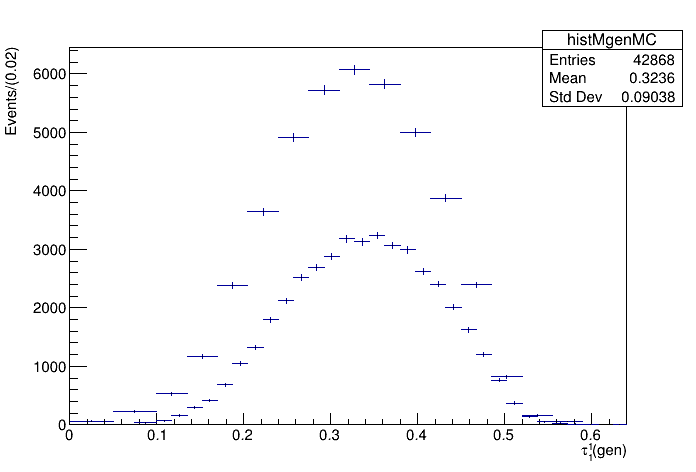

In [126]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


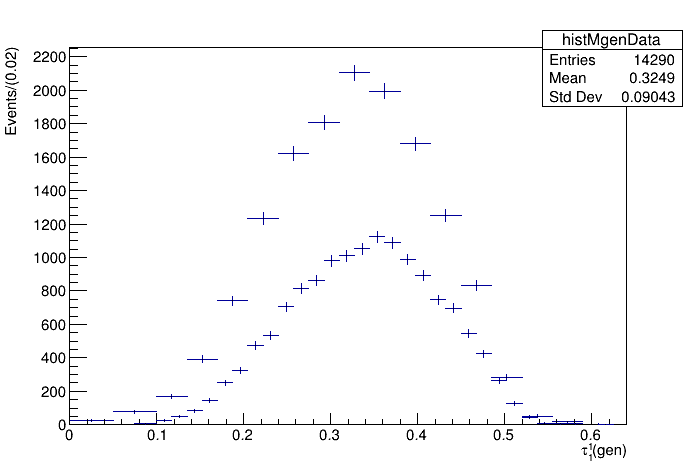

In [127]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

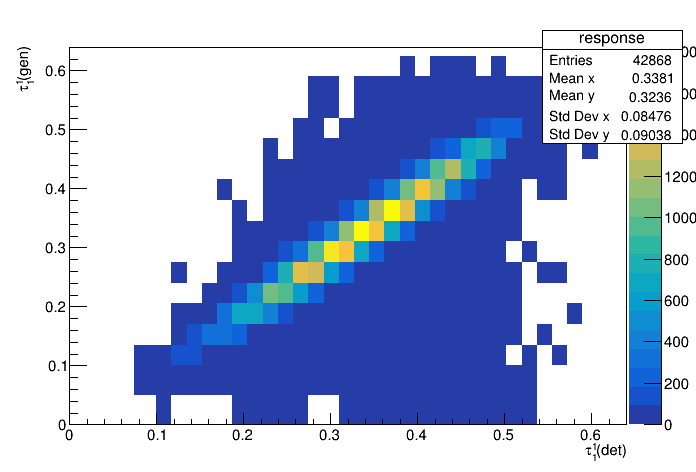

In [128]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [129]:
#### In MC :

Warning in <TCanvas::Constructor>: Deleting canvas with same name: MCcompare


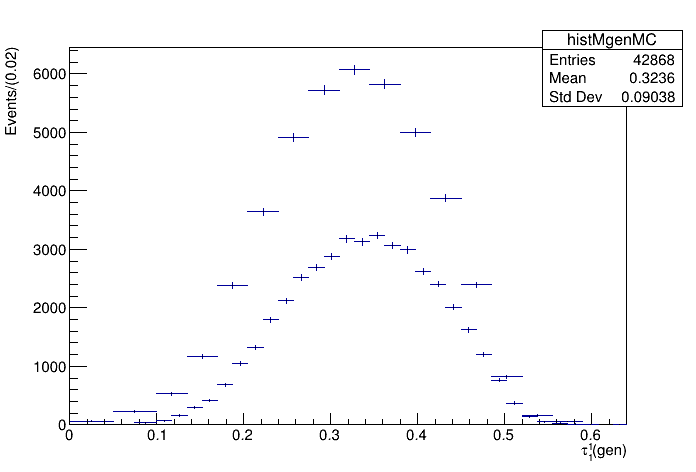

In [130]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [131]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 35 input bins and 18 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{1}^{1}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #19 (yaxis:#tau_{1}^{1}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: datadists


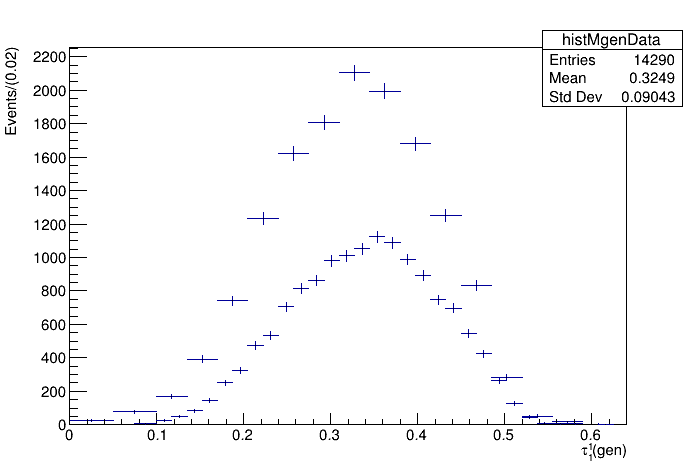

In [132]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [133]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


10005

Warning in <TUnfoldDensity::SetInput>: 5/35 input bins have zero error, and are ignored.
Warning in <TUnfoldDensity::SetInput>: no data to constrain output bin #18 (yaxis:#tau_{1}^{1}(gen)[0.625,0.64])
Error in <TUnfoldDensity::SetInput>: One output bins is not constrained by any data.


Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [111]:
print 'regularizing'
nScan=50
tauMin=-5.0
tauMax=10.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

regularizing
doing the unfolding
getting the results


Info in <TUnfoldDensity::ScanLcurve>: logtau=-Infinity X=1.162957 Y=8.381455
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.496118 X=1.217467 Y=8.249957
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.996118 X=1.165502 Y=8.346738
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.746118 X=1.177255 Y=8.305053
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.621118 X=1.192003 Y=8.278627
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.871118 X=1.169309 Y=8.328254
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.558618 X=1.203071 Y=8.264561
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.683618 X=1.183576 Y=8.292153
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.808618 X=1.172617 Y=8.317157
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.527368 X=1.209804 Y=8.257328
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.933618 X=1.167027 Y=8.338153
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.589868 X=1.197167 Y=8.271660
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.652368 X=1.187496 Y=8.285461

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


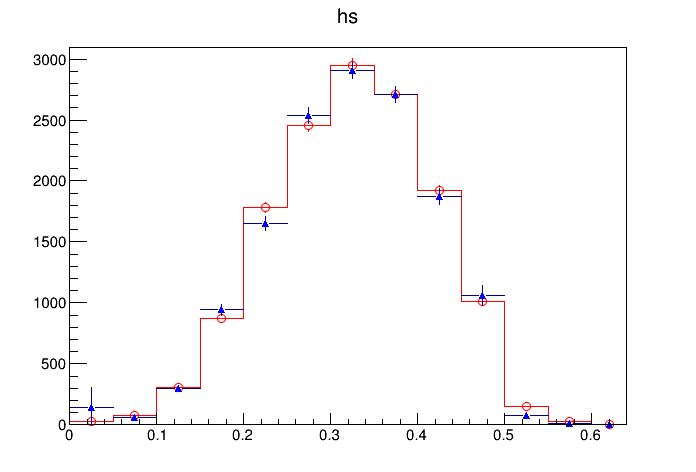

In [112]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(4)
histMgenData.SetMarkerColor(2)
histMgenData.SetOption("E")
histMgenData.SetLineColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "E HIST")
hs.Add( unfolded, "E")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_1^{(2)}$

Get the response matrix and input 1D distributions for unfolding.

In [109]:
#print np.min(TT16gen_nSub_basis[:,2])
#print np.min(TT16reco_nSub_basis[:,2])
print np.max(TT16gen_nSub_basis[:,2])
print np.max(TT16reco_nSub_basis[:,2])

#print np.min(TT16data_nSub_basis[:,2])
print np.max(TT16data_nSub_basis[:,2])
#print np.min(TT16truth_nSub_basis[:,2])
print np.max(TT16truth_nSub_basis[:,2])



0.4229806959629059
0.427227258682251
0.40370994806289673
0.3995612561702728


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [123]:
nDet=24
nGen=12

gen_bins = [x for x in np.linspace(num=15, start=0., stop=0.35)]
#print gen_bins
gen_bins = np.concatenate((gen_bins, np.array([0.39,0.43])))
print gen_bins, gen_bins.shape[0]

det_bins = [x for x in np.linspace(num=29, start=0., stop=0.35)]
#print det_bins
det_bins = np.concatenate((det_bins, np.array([0.38,0.41,0.43])))
print det_bins, det_bins.shape[0]
#nt_t  binnum = sizeof(bins)/sizeof(Float_t) - 1; // or just = 9
#TH1F* h = new TH1F("n","t", binnum, bins);

xminDet=0.
xmaxDet=0.43
xminGen=0.
xmaxGen=0.43
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.39  0.43 ] 17
[0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125  0.1375 0.15   0.1625 0.175  0.1875 0.2    0.2125 0.225  0.2375
 0.25   0.2625 0.275  0.2875 0.3    0.3125 0.325  0.3375 0.35   0.38
 0.41   0.43  ] 32


In [124]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{1}^{2}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC, TT16gen_nSub_basis[:,2])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{1}^{2}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC, TT16reco_nSub_basis[:,2])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{1}^{2}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenData, TT16truth_nSub_basis[:,2])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{1}^{2}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, TT16data_nSub_basis[:,2])


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,2].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,2].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,2].flatten()
fill_hist(response, hist2Dfill)

Warning in <TFile::Append>: Replacing existing TH1: histMgenMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetMC (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMgenData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: response (Potential memory leak).


Set the X and Y axis labels

In [125]:
response.SetTitle(";#tau_{1}^{2}(det);#tau_{1}^{2}(gen)")


histMgenMC.SetTitle(";#tau_{1}^{2}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{1}^{2}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{1}^{2}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{1}^{2}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

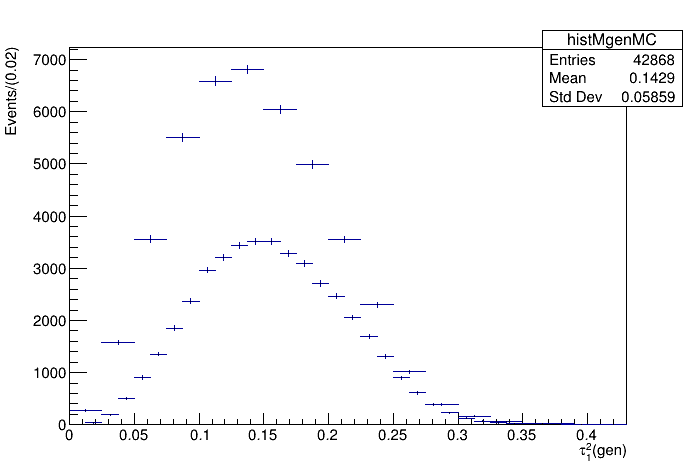

In [126]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


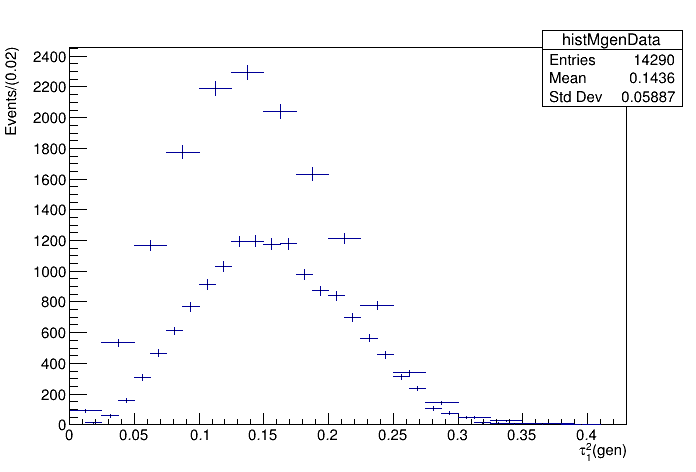

In [127]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

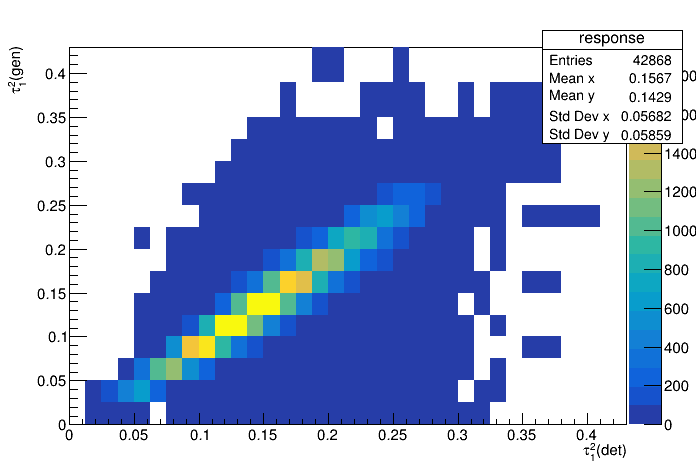

In [128]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [129]:
#### In MC :

Warning in <TCanvas::Constructor>: Deleting canvas with same name: MCcompare


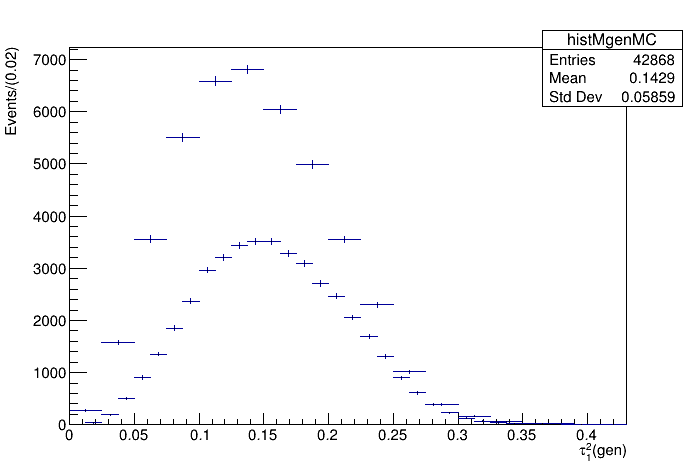

In [130]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: datadists


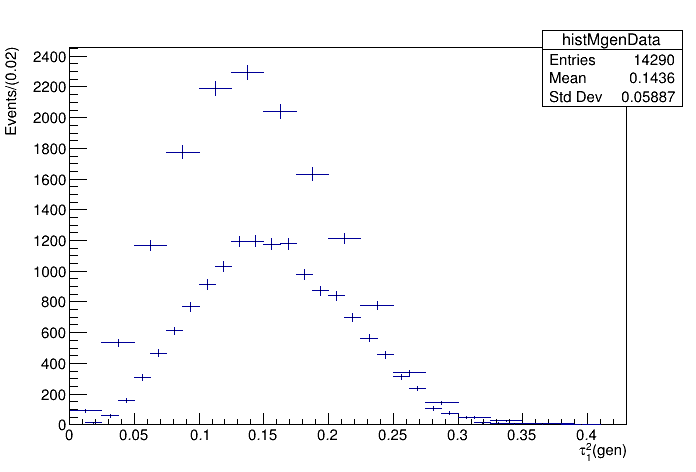

In [131]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [132]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 31 input bins and 16 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{1}^{2}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #17 (yaxis:#tau_{1}^{2}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [133]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


2

Warning in <TUnfoldDensity::SetInput>: 2/31 input bins have zero error, and are ignored.


Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [134]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

regularizing
doing the unfolding
getting the results


Info in <TUnfoldDensity::ScanLcurve>: logtau=-Infinity X=1.384947 Y=8.726235
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.588076 X=1.457714 Y=8.357608
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.088076 X=1.391361 Y=8.606994
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.588076 X=1.385060 Y=8.709978
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.838076 X=1.413325 Y=8.481002
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.713076 X=1.433344 Y=8.413770
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.963076 X=1.399360 Y=8.549034
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.338076 X=1.385902 Y=8.679573
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.213076 X=1.387518 Y=8.650183
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.775576 X=1.422664 Y=8.446509
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.900576 X=1.405535 Y=8.515699
Info in <TUnfoldDensity::ScanLcurve>: logtau=-3.650576 X=1.445096 Y=8.383955
Info in <TUnfoldDensity::ScanLcurve>: logtau=-4.025576 X=1.394707 Y=8.579736

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


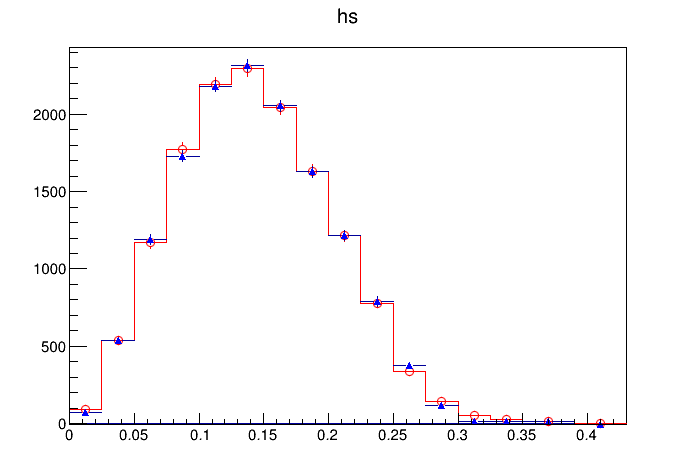

In [148]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(4)
histMgenData.SetMarkerColor(2)
histMgenData.SetOption("E")
histMgenData.SetLineColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "E HIST")
hs.Add( unfolded, "E")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_2^{(0.5)}$

#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,3])
print np.min(TT16reco_nSub_basis[:,3])
print np.max(TT16gen_nSub_basis[:,3])
print np.max(TT16reco_nSub_basis[:,3])

In [ ]:
nDet=28
nGen=14
xminDet=0.0
xmaxDet=0.65
xminGen=0.0
xmaxGen=0.65
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8

In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_tau2_0p5)

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_tau2_0p5)

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_tau2_0p5)

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_tau2_0p5)


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_tau2_0p5.shape[0], 2))
hist2Dfill[:,0] = TT16reco_tau2_0p5.flatten()
hist2Dfill[:,1] = TT16gen_tau2_0p5.flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{2}^{0.5}(det);#tau_{2}^{0.5}(gen)")


histMgenMC.SetTitle(";#tau_{2}^{0.5}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{2}^{0.5}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{2}^{0.5}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{2}^{0.5}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=-5.0
tauMax=10.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_2^{(1)}$

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,4])
print np.min(TT16reco_nSub_basis[:,4])
print np.max(TT16gen_nSub_basis[:,4])
print np.max(TT16reco_nSub_basis[:,4])

#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [ ]:
nDet=30
nGen=15
xminDet=0.0
xmaxDet=0.44
xminGen=0.0
xmaxGen=0.44
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_tau2_1)

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_tau2_1)

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_tau2_1)

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_tau2_1)


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_tau2_1.shape[0], 2))
hist2Dfill[:,0] = TT16reco_tau2_1.flatten()
hist2Dfill[:,1] = TT16gen_tau2_1.flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{2}^{1}(det);#tau_{2}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{2}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{2}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{2}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{2}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_2^{(2)}$

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,5])
print np.min(TT16reco_nSub_basis[:,5])
print np.max(TT16gen_nSub_basis[:,5])
print np.max(TT16reco_nSub_basis[:,5])

#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [ ]:
nDet=28
nGen=14
xminDet=0.0
xmaxDet=0.23
xminGen=0.0
xmaxGen=0.23
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_tau2_2)

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_tau2_2)

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_tau2_2)

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_tau2_2)


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_tau2_2.shape[0], 2))
hist2Dfill[:,0] = TT16reco_tau2_2.flatten()
hist2Dfill[:,1] = TT16gen_tau2_2.flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{2}^{2}(det);#tau_{2}^{2}(gen)")


histMgenMC.SetTitle(";#tau_{2}^{2}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{2}^{2}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{2}^{2}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{2}^{2}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=-5.0
tauMax=10.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_3^{(0.5)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,6])
print np.min(TT16reco_nSub_basis[:,6])
print np.max(TT16gen_nSub_basis[:,6])
print np.max(TT16reco_nSub_basis[:,6])

In [ ]:
nDet=28
nGen=14
xminDet=0.0
xmaxDet=0.56
xminGen=0.0
xmaxGen=0.56
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{3}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,6])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{3}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,6])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{3}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,6])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{3}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,6])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,6].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,6].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,6].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{3}^{0.5}(det);#tau_{3}^{0.5}(gen)")


histMgenMC.SetTitle(";#tau_{3}^{0.5}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{3}^{0.5}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{3}^{0.5}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{3}^{0.5}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_3^{(1)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,7])
print np.min(TT16reco_nSub_basis[:,7])
print np.max(TT16gen_nSub_basis[:,7])
print np.max(TT16reco_nSub_basis[:,7])

In [ ]:
nDet=50
nGen=25
xminDet=0.0
xmaxDet=0.3
xminGen=0.0
xmaxGen=0.3
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{3}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,7])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{3}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,7])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{3}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,7])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{3}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,7])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,7].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,7].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,7].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{3}^{1}(det);#tau_{3}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{3}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{3}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{3}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{3}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=10
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_3^{(2)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,8])
print np.min(TT16reco_nSub_basis[:,8])
print np.max(TT16gen_nSub_basis[:,8])
print np.max(TT16reco_nSub_basis[:,8])

In [ ]:
nDet=32
nGen=16
xminDet=0.0
xmaxDet=0.16
xminGen=0.0
xmaxGen=0.16
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{3}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,8])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{3}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,8])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{3}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,8])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{3}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,8])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,8].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,8].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,8].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{3}^{2}(det);#tau_{3}^{2}(gen)")


histMgenMC.SetTitle(";#tau_{3}^{2}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{3}^{2}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{3}^{2}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{3}^{2}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=10
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_4^{(0.5)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,9])
print np.min(TT16reco_nSub_basis[:,9])
print np.max(TT16gen_nSub_basis[:,9])
print np.max(TT16reco_nSub_basis[:,9])

In [ ]:
nDet=28
nGen=14
xminDet=0.0
xmaxDet=0.56
xminGen=0.0
xmaxGen=0.56
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{4}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,9])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{4}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,9])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{4}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,9])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{4}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,9])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,9].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,9].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,9].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{4}^{0.5}(det);#tau_{4}^{0.5}(gen)")


histMgenMC.SetTitle(";#tau_{4}^{0.5}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{4}^{0.5}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{4}^{0.5}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{4}^{0.5}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_4^{(1)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,10])
print np.min(TT16reco_nSub_basis[:,10])
print np.max(TT16gen_nSub_basis[:,10])
print np.max(TT16reco_nSub_basis[:,10])

In [ ]:
nDet=50
nGen=25
xminDet=0.0
xmaxDet=0.3
xminGen=0.0
xmaxGen=0.3
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{4}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,10])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{4}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,10])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{4}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,10])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{4}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,10])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,10].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,10].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,10].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{4}^{1}(det);#tau_{4}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{4}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{4}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{4}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{4}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=20
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_4^{(2)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,11])
print np.min(TT16reco_nSub_basis[:,11])
print np.max(TT16gen_nSub_basis[:,11])
print np.max(TT16reco_nSub_basis[:,11])

In [ ]:
nDet=30
nGen=15
xminDet=0.0
xmaxDet=0.09
xminGen=0.0
xmaxGen=0.09
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{4}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,11])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{4}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,11])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{4}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,11])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{4}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,11])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,11].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,11].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,11].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{4}^{2}(det);#tau_{4}^{2}(gen)")


histMgenMC.SetTitle(";#tau_{4}^{2}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{4}^{2}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{4}^{2}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{4}^{2}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_5^{(0.5)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,12])
print np.min(TT16reco_nSub_basis[:,12])
print np.max(TT16gen_nSub_basis[:,12])
print np.max(TT16reco_nSub_basis[:,12])

In [ ]:
nDet=30
nGen=15
xminDet=0.0
xmaxDet=0.5
xminGen=0.0
xmaxGen=0.5
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{5}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,12])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{5}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,12])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{5}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,12])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{5}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,12])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,12].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,12].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,12].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{5}^{0.5}(det);#tau_{5}^{0.5}(gen)")


histMgenMC.SetTitle(";#tau_{5}^{0.5}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{5}^{0.5}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{5}^{0.5}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{5}^{0.5}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_5^{(1)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,13])
print np.min(TT16reco_nSub_basis[:,13])
print np.max(TT16gen_nSub_basis[:,13])
print np.max(TT16reco_nSub_basis[:,13])

In [ ]:
nDet=30
nGen=15
xminDet=0.0
xmaxDet=0.3
xminGen=0.0
xmaxGen=0.3
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{5}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,13])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{5}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,13])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{5}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,13])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{5}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,13])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,13].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,13].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,13].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{5}^{1}(det);#tau_{5}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{5}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{5}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{5}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{5}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_5^{(2)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,14])
print np.min(TT16reco_nSub_basis[:,14])
print np.max(TT16gen_nSub_basis[:,14])
print np.max(TT16reco_nSub_basis[:,14])

In [ ]:
nDet=32
nGen=16
xminDet=0.0
xmaxDet=0.08
xminGen=0.0
xmaxGen=0.08
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{5}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,14])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{5}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,14])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{5}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,14])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{5}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,14])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,14].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,14].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,14].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{5}^{2}(det);#tau_{5}^{2}(gen)")


histMgenMC.SetTitle(";#tau_{5}^{2}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{5}^{2}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{5}^{2}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{5}^{2}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_6^{(0.5)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,15])
print np.min(TT16reco_nSub_basis[:,15])
print np.max(TT16gen_nSub_basis[:,15])
print np.max(TT16reco_nSub_basis[:,15])

In [ ]:
nDet=40
nGen=20
xminDet=0.0
xmaxDet=0.42
xminGen=0.0
xmaxGen=0.42
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{5}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,15])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{5}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,15])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{5}^{0.5}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,15])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{5}^{0.5}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,15])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,15].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,15].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,15].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{5}^{0.5}(det);#tau_{5}^{0.5}(gen)")


histMgenMC.SetTitle(";#tau_{5}^{0.5}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{5}^{0.5}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{5}^{0.5}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{5}^{0.5}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_6^{(1)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,16])
print np.min(TT16reco_nSub_basis[:,16])
print np.max(TT16gen_nSub_basis[:,16])
print np.max(TT16reco_nSub_basis[:,16])

In [ ]:
nDet=32
nGen=16
xminDet=0.0
xmaxDet=0.2
xminGen=0.0
xmaxGen=0.2
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{5}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,16])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{5}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,16])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{5}^{1}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,16])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{5}^{1}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,16])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,16].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,16].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,16].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{5}^{1}(det);#tau_{5}^{1}(gen)")


histMgenMC.SetTitle(";#tau_{5}^{1}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{5}^{1}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{5}^{1}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{5}^{1}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()

# Unfold $\tau_6^{(2)}$

#### Below the input Monte Carlo simulation events are read from the file which only contains events meeting the skim criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

Get the response matrix and input 1D distributions for unfolding.

In [ ]:
print np.min(TT16gen_nSub_basis[:,17])
print np.min(TT16reco_nSub_basis[:,17])
print np.max(TT16gen_nSub_basis[:,17])
print np.max(TT16reco_nSub_basis[:,17])

In [ ]:
nDet=30
nGen=15
xminDet=0.0
xmaxDet=0.06
xminGen=0.0
xmaxGen=0.06
#weight_TT16 = (831.76*lumi*1000.)/10199051.*np.ones(TT16_beta4W.shape[0])*TT16_puWeight*TT16_btagWeight*0.8


In [ ]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{5}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenMC, TT16gen_nSub_basis[:,17])

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{5}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetMC, TT16reco_nSub_basis[:,17])

histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{5}^{2}; Events/(0.02)", nGen, xminGen,xmaxGen)
fill_hist(histMgenData, TT16truth_nSub_basis[:,17])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{5}^{2}; Events/(0.02)", nDet, xminDet,xmaxDet)
fill_hist(histMdetData, TT16data_nSub_basis[:,17])


response = ROOT.TH2D('response', 'response', nDet, xminDet, xmaxDet, nGen, xminGen, xmaxGen)
hist2Dfill = np.zeros((TT16reco_nSub_basis[:,17].shape[0], 2))
hist2Dfill[:,0] = TT16reco_nSub_basis[:,17].flatten()
hist2Dfill[:,1] = TT16gen_nSub_basis[:,17].flatten()
fill_hist(response, hist2Dfill)

Set the X and Y axis labels

In [ ]:
response.SetTitle(";#tau_{5}^{2}(det);#tau_{5}^{2}(gen)")


histMgenMC.SetTitle(";#tau_{5}^{2}(gen)")
#histMgenMC.SetFillColor(ROOT.kRed)
#histMgenMC.SetLineColor(ROOT.kRed)

histMdetMC.SetTitle(";#tau_{5}^{2}(det)")
#histMdetMC.SetFillColor(ROOT.kBlue)
#histMdetMC.SetLineColor(ROOT.kBlue)


histMgenData.SetTitle(";#tau_{5}^{2}(gen)")
#histMgenData.SetFillColor(ROOT.kGreen+2)
#histMgenData.SetLineColor(ROOT.kGreen+2)

histMdetData.SetTitle(";#tau_{5}^{2}(det)")
#histMdetData.SetFillColor(ROOT.kBlack)
#histMdetData.SetLineColor(ROOT.kBlack)

Draw the variables at reco and gen level and for "data"

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

In [ ]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
histMgenData.Draw("e")
histMdetData.Draw("e same")
c1.Draw()

Draw the response matrix.

In [ ]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [ ]:
#### In MC :

In [ ]:
c2 = ROOT.TCanvas("MCcompare", "MCcompare")
histMgenMC.Draw('e')
histMdetMC.Draw('e same')
c2.Draw()

#### In Data:

In [ ]:
c3 = ROOT.TCanvas("datadists", "datadists")
histMgenData.Draw('e')
histMdetData.Draw('e same')
c3.Draw()

In [ ]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [ ]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

Unfold nScan times with values for the regularization parameter between tauMin and tauMax using the empty TSplines to store the results.

In [ ]:
print 'regularizing'
nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)

print 'doing the unfolding'
tunfolder.ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY);
print 'getting the results'
unfolded = tunfolder.GetOutput("unfolded")

In [ ]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(4)
unfolded.SetFillColor(0)
histMgenData.SetMarkerStyle(21)
histMgenData.SetMarkerColor(2)

hs = ROOT.THStack("hs", "hs")
hs.Add( histMgenData, "hist")
hs.Add( unfolded, "e")
hs.Draw("nostack")
c5.Draw()